## Random Search Hyperparameter Tuning for a Random Forest Classifier
In this exercise, we will revisit the handwritten digit classification problem, this time using a random forest classifier with hyperparameters tuned using a random search strategy. The random forest is a popular method used for both single-class and multi-class classification problems. It learns by growing n simple tree models that each progressively split the dataset into areas that best separate the points of different classes.

The final model produced can be thought of as the average of each of the n tree models. In this way, the random forest is an **ensemble** method. The parameters we will tune in this exercise are **criterion** and **max_features**. 

**criterion** refers to the way in which each split is evaluated from a class purity perspective (the purer the splits, the better) and **max_features** is the maximum number of features the random forest can use when finding the best splits.

In [1]:
from sklearn import datasets

In [2]:
# load data
digits = datasets.load_digits()

# target
y = digits.target

# features
X = digits.data

In [12]:
# initialize random forest classifier with n_estimators=100; Final model will be the average of 100 simple tree models.
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [14]:
# how many features in the dataset?
n_features = X.shape[1]
print(n_features)

64


Set a discrete uniform distribution covering the range 1 to 64. Remember the probability mass function, P(X=x) = 1/n, for this distribution, so P(X=x) = 1/64 in our case. Because criterion has only two discrete options, this will also be sampled as a discrete uniform distribution with P(X=x) = ½:

In [15]:
# Sample from distribution and max features as discrete uniform distributions
from scipy import stats
param_dist = {'criterion': ['gini', 'entropy'],
             'max_features': stats.randint(low=1, high=n_features)}

We now have everything we need to set up the randomized search process. As before, we will use accuracy as the metric of model evaluation.

In [16]:
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
from sklearn import model_selection
rscv = model_selection.RandomizedSearchCV(estimator=rfc,
                                         param_distributions=param_dist,
                                         n_iter=50, cv=5, scoring='accuracy',
                                         random_state=100)

In [17]:
# start the process
rscv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff7f6005e80>},
                   random_state=100, scoring='accuracy')

Next, you need to examine the results. Create a pandas DataFrame from the results attribute, order by the rank_test_score, and look at the top five model hyperparameterizations. Note that because the random search draws samples of hyperparameterizations at random, it is possible to have duplication. We remove the duplicate entries from the DataFrame

In [19]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)

# removing duplication
distinct_results = results.loc[:,['params', 'mean_test_score']]

# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')

# remove duplicates
distinct_results.drop_duplicates(inplace=True)

# look at top 5 best hyperparameterizations
distinct_results.sort_values('mean_test_score', ascending=False).head(5)

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 11}",0.940470
48,"{'criterion': 'gini', 'max_features': 4}",0.939913
19,"{'criterion': 'gini', 'max_features': 5}",0.937700
14,"{'criterion': 'gini', 'max_features': 3}",0.937694
21,"{'criterion': 'entropy', 'max_features': 8}",0.936582


The last step is to visualize the result. Including every parameterization will result in a cluttered plot, so we will filter on parameterizations that resulted in a mean test score > 0.93:

<AxesSubplot:ylabel='params'>

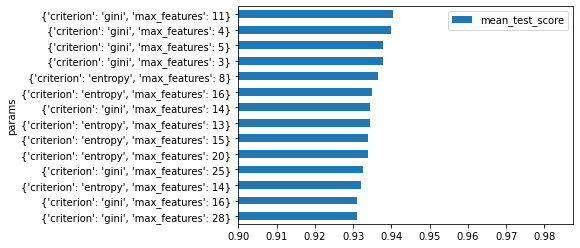

In [20]:
# visualize top performing models
distinct_results[distinct_results.mean_test_score > 0.93].sort_values(
'mean_test_score').plot.barh(x='params', xlim=(0.9))